In [15]:
from dipy.viz import fvtk
from dipy.io.image import load_nifti
from matplotlib import pyplot as plt
import nibabel as nib

[[   0.            0.            1.          -85.38075256]
 [  -1.            0.            0.          159.33110046]
 [   0.            1.            0.         -161.54492188]
 [   0.            0.            0.            1.        ]]
Image acquise


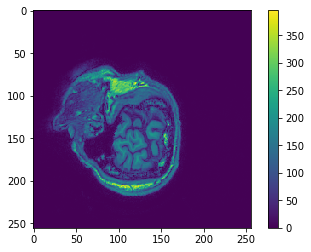

[[   1.            0.            0.         -125.38075256]
 [   0.            1.            0.          -96.66889954]
 [   0.            0.            1.         -161.54492188]
 [   0.            0.            0.            1.        ]]
Image Freesurfer RAS


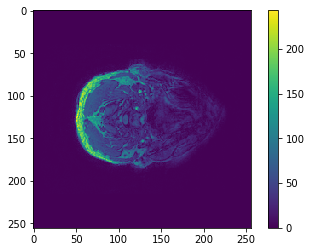

[[  -1.            0.            0.          130.61924744]
 [   0.            1.            0.          -96.66889954]
 [   0.            0.            1.         -161.54492188]
 [   0.            0.            0.            1.        ]]
Image Freesurfer LAS


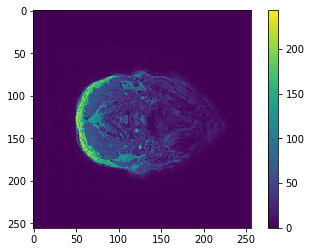

In [13]:
imaAcc, affineAcc = load_nifti("/NAS/tupac/protocoles/prodigy2/data/BOURGOIS^PHILIPPE_PRODIGY_2018-01-16/20180116_082936WIP3DT1ipatSENSEs201a1002.nii.gz")
print(affineAcc)
plt.imshow(imaAcc[:,:,24])
plt.colorbar()
print("Image acquise")
plt.show()

#mri_convert orig.mgz orig_LAS.nii.gz --out_orientation RAS
imaFS_RAS, affineFS_RAS = load_nifti("/NAS/tupac/protocoles/prodigy2/process/BOURGOIS^PHILIPPE_PRODIGY_2018-01-16/mri/orig_RAS.nii.gz")
print(affineFS_RAS)
plt.imshow(imaFS_RAS[:,:,24])
plt.colorbar()
print("Image Freesurfer RAS")
plt.show()

#mri_convert orig.mgz orig_LAS.nii.gz --out_orientation LAS
imaFS_LAS, affineFS_LAS = load_nifti("/NAS/tupac/protocoles/prodigy2/process/BOURGOIS^PHILIPPE_PRODIGY_2018-01-16/mri/orig_LAS.nii.gz")
print(affineFS_LAS)
plt.imshow(imaFS_LAS[:,:,24])
plt.colorbar()
print("Image Freesurfer LAS")
plt.show()

In [29]:
r = fvtk.ren()

imaAcc = nib.load("/NAS/tupac/protocoles/prodigy2/data/BOURGOIS^PHILIPPE_PRODIGY_2018-01-16/20180116_082936WIP3DT1ipatSENSEs201a1002.nii.gz")
print(imaAcc.affine)
imaAcc_s = fvtk.slicer(imaAcc.get_data(),imaAcc.affine)
imaAcc_s.display(None, None,152)
fvtk.add(r,imaAcc_s)

#mri_convert orig.mgz orig_LAS.nii.gz --out_orientation RAS
imaFS_RAS = nib.load("/NAS/tupac/protocoles/prodigy2/process/BOURGOIS^PHILIPPE_PRODIGY_2018-01-16/mri/orig_RAS.nii.gz")
print(imaFS_RAS.affine)
imaFS_RAS_s = fvtk.slicer(imaFS_RAS.get_data(),imaFS_RAS.affine)
imaFS_RAS_s.display(None, None,162)
fvtk.add(r,imaFS_RAS_s)

#mri_convert orig.mgz orig_LAS.nii.gz --out_orientation LAS
imaFS_LAS = nib.load("/NAS/tupac/protocoles/prodigy2/process/BOURGOIS^PHILIPPE_PRODIGY_2018-01-16/mri/orig_LAS.nii.gz")
print(imaFS_LAS.affine)
imaFS_LAS_s = fvtk.slicer(imaFS_LAS.get_data(),imaFS_LAS.affine)
imaFS_LAS_s.display(None, None,172)
fvtk.add(r,imaFS_LAS_s)

a=fvtk.axes()
fvtk.add(r,a)

fvtk.show(r)

[[   0.            0.            1.          -85.38075256]
 [  -1.            0.            0.          159.33110046]
 [   0.            1.            0.         -161.54492188]
 [   0.            0.            0.            1.        ]]
[[   1.            0.            0.         -125.38075256]
 [   0.            1.            0.          -96.66889954]
 [   0.            0.            1.         -161.54492188]
 [   0.            0.            0.            1.        ]]
[[  -1.            0.            0.          130.61924744]
 [   0.            1.            0.          -96.66889954]
 [   0.            0.            1.         -161.54492188]
 [   0.            0.            0.            1.        ]]


In [30]:
from nipype.interfaces.freesurfer import BBRegister
#bbreg = BBRegister(subject_id='BOURGOIS^PHILIPPE_PRODIGY_2018-01-16', source_file='structural.nii', init='header', contrast_type='t1')
#bbreg.cmdline

In [61]:
from nipype.interfaces import fsl
flt = fsl.FLIRT(bins=640, cost_func='mutualinfo')
flt.inputs.in_file = '/NAS/tupac/protocoles/prodigy2/data/BOURGOIS^PHILIPPE_PRODIGY_2018-01-16/20180116_082936WIP3DT1ipatSENSEs201a1002.nii.gz'
flt.inputs.reference = '/NAS/tupac/protocoles/prodigy2/process/BOURGOIS^PHILIPPE_PRODIGY_2018-01-16/mri/orig_RAS.nii.gz'
flt.inputs.output_type = "NIFTI_GZ"
#flt.inputs.out_log = '/NAS/tupac/protocoles/prodigy2/process/BOURGOIS^PHILIPPE_PRODIGY_2018-01-16/mri/flirt.log'
flt.inputs.out_matrix_file = '/NAS/tupac/protocoles/prodigy2/process/BOURGOIS^PHILIPPE_PRODIGY_2018-01-16/mri/affine.mat'
flt.cmdline 
res = flt.run() 

In [62]:
print(flt.out_matrix_file)

AttributeError: 'FLIRT' object has no attribute 'out_matrix_file'

In [64]:
!ls -l *.nii.gz
!more /NAS/tupac/protocoles/prodigy2/process/BOURGOIS^PHILIPPE_PRODIGY_2018-01-16/mri/affine.mat

-rw-rw-r-- 1 romain ingenieur 7414501 mars  21 08:30 20180116_082936WIP3DT1ipatSENSEs201a1002_flirt.nii.gz
-rw-rw-r-- 1 romain ingenieur 1681862 avril 25  2017 essai_test_aEffacer.nii.gz
-rw-rw-r-- 1 romain ingenieur   79367 mars  23  2017 lh.MNI305.cluster.nii.gz
-4.371138829e-08  0  -1  215.0000064  
-1  -4.371138829e-08  4.371138829e-08  256.000001  
-4.371138829e-08  1  1.910685466e-15  6.4289158e-06  
0  0  0  1  


In [ ]:
#fvtk.add(r, actor.line(fbc_sl_orig, clrs_orig, linewidth=0.2))
#fvtk.add(r, actor.line(fbc_sl_thres, clrs_thres, linewidth=0.2))
fvtk.show(r)